## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import re 
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRANAY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading the dataset

In [2]:
news_dataset = pd.read_csv('news.csv')

In [3]:
#printing the first several rows of news data

news_dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#printing the last several rows of news dataset

news_dataset.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


## Count Vectorizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [6]:
x = news_dataset['text']
y = news_dataset['label']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=53)

In [8]:
count_vectorizer = CountVectorizer(stop_words = 'english')

In [9]:
count_train = count_vectorizer.fit_transform(x_train)

In [10]:
count_test = count_vectorizer.transform(x_test)

In [11]:
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000billion', '000ft']


## TfidfVectorizer for text classification

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english' , max_df = 0.7)

In [14]:
tfidf_train  = tfidf_vectorizer.fit_transform(x_train)

In [15]:
tfidf_test = tfidf_vectorizer.transform(x_test)

In [16]:
print(tfidf_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000billion', '000ft']


In [17]:
print(tfidf_train.A[:5])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04169599 0.         ... 0.         0.         0.        ]
 [0.         0.03144782 0.         ... 0.         0.         0.        ]
 [0.         0.01437699 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Inspecting the vectors

In [18]:
count_df =  pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [19]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [20]:
print(count_df.head())

   00  000  0000  00000031  000035  00006  0001  0001pt  000billion  000ft  \
0   0    0     0         0       0      0     0       0           0      0   
1   0    3     0         0       0      0     0       0           0      0   
2   0    1     0         0       0      0     0       0           0      0   
3   0    1     0         0       0      0     0       0           0      0   
4   0    0     0         0       0      0     0       0           0      0   

   ...  حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0  ...    0     0   0   0   0        0   0    0        0      0  
1  ...    0     0   0   0   0        0   0    0        0      0  
2  ...    0     0   0   0   0        0   0    0        0      0  
3  ...    0     0   0   0   0        0   0    0        0      0  
4  ...    0     0   0   0   0        0   0    0        0      0  

[5 rows x 57870 columns]


In [21]:
print(tfidf_df.head())

    00       000  0000  00000031  000035  00006  0001  0001pt  000billion  \
0  0.0  0.000000   0.0       0.0     0.0    0.0   0.0     0.0         0.0   
1  0.0  0.041696   0.0       0.0     0.0    0.0   0.0     0.0         0.0   
2  0.0  0.031448   0.0       0.0     0.0    0.0   0.0     0.0         0.0   
3  0.0  0.014377   0.0       0.0     0.0    0.0   0.0     0.0         0.0   
4  0.0  0.000000   0.0       0.0     0.0    0.0   0.0     0.0         0.0   

   000ft  ...  حلب  عربي   عن   لم   ما  محاولات   من  هذا  والمرضى  ยงade  
0    0.0  ...  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
1    0.0  ...  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
2    0.0  ...  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
3    0.0  ...  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
4    0.0  ...  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  

[5 rows x 57870 columns]


In [22]:
difference = set(count_df.columns) - set(tfidf_df.columns)

In [23]:
print(difference)

set()


In [24]:
print(count_df.equals(tfidf_df))

False


# Model Building

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=53)

### Training and testing the "fake news" model with CountVectorizer

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.pipeline import Pipeline

In [27]:
nb_classifier = MultinomialNB()

In [28]:
nb_classifier.fit(count_train, y_train)

MultinomialNB()

In [29]:
pred = nb_classifier.predict(count_test)

In [30]:
score = accuracy_score(y_test,pred)

In [31]:
print(score)

0.9021567596002105


In [32]:
cm = confusion_matrix(y_test,pred,labels=['FAKE','REAL'])

In [33]:
print(cm)

[[794 119]
 [ 67 921]]


<AxesSubplot:>

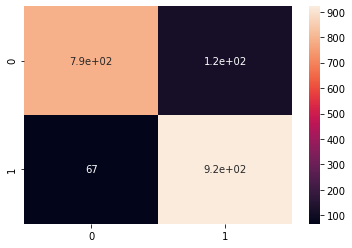

In [34]:
sns.heatmap(cm,annot=True)

### Training and testing the "fake news" model with TfidfVectorizer

In [35]:
nb_classifier = MultinomialNB()

In [36]:
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB()

In [37]:
pred = nb_classifier.predict(tfidf_test)

In [38]:
score = accuracy_score(y_test,pred)

In [39]:
print(score)

0.8632298790110469


In [40]:
cm = confusion_matrix(y_test,pred,labels=['FAKE','REAL'])

In [41]:
print(cm)

[[677 236]
 [ 24 964]]


<AxesSubplot:>

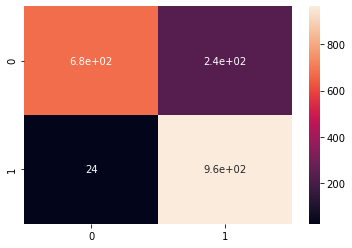

In [42]:
sns.heatmap(cm,annot=True)

In [43]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),('nbmodel', MultinomialNB())])

In [44]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nbmodel', MultinomialNB())])

In [45]:
pred = pipeline.predict(x_test)

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        FAKE       0.97      0.74      0.84       913
        REAL       0.80      0.98      0.88       988

    accuracy                           0.86      1901
   macro avg       0.88      0.86      0.86      1901
weighted avg       0.88      0.86      0.86      1901



In [47]:
print(confusion_matrix(y_test, pred))

[[677 236]
 [ 24 964]]


### simple NLP,complex problems

In [48]:
alphas = np.arange(0,1,0.1)

In [49]:
def train_and_predict(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train,y_train)
    pred  = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test,pred)
    return score

In [50]:
for alpha in alphas:
    print('Alpha: ',alpha)
    print('Score: ',train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.8858495528669121

Alpha:  0.1
Score:  0.9042609153077328

Alpha:  0.2
Score:  0.9011046817464492

Alpha:  0.30000000000000004
Score:  0.8953182535507628

Alpha:  0.4
Score:  0.8921620199894792

Alpha:  0.5
Score:  0.8884797475013151

Alpha:  0.6000000000000001
Score:  0.8826933193056287

Alpha:  0.7000000000000001


C:\Users\PRANAY\AppData\Roaming\Python\Python38\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Score:  0.875854813256181

Alpha:  0.8
Score:  0.8695423461336139

Alpha:  0.9
Score:  0.8679642293529721



### Inspecting model

In [51]:
class_labels = nb_classifier.classes_

In [52]:
feature_names = tfidf_vectorizer.get_feature_names()

In [53]:
feat_with_weights = sorted(zip(nb_classifier.coef_[0],feature_names))

C:\Users\PRANAY\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [54]:
print(class_labels[0],feat_with_weights[:20])

FAKE [(-11.341258518813937, '0000'), (-11.341258518813937, '000035'), (-11.341258518813937, '0001'), (-11.341258518813937, '0001pt'), (-11.341258518813937, '000billion'), (-11.341258518813937, '000km'), (-11.341258518813937, '0011'), (-11.341258518813937, '006s'), (-11.341258518813937, '007'), (-11.341258518813937, '007s'), (-11.341258518813937, '008s'), (-11.341258518813937, '0099'), (-11.341258518813937, '00am'), (-11.341258518813937, '00p'), (-11.341258518813937, '00pm'), (-11.341258518813937, '013c2812c9'), (-11.341258518813937, '014'), (-11.341258518813937, '015'), (-11.341258518813937, '01am'), (-11.341258518813937, '020')]


In [55]:
print(class_labels[1],feat_with_weights[-20:])

REAL [(-7.729810615303525, 'states'), (-7.704509585631655, 'rubio'), (-7.692071675682123, 'voters'), (-7.635642936030905, 'republicans'), (-7.635015458621373, 'house'), (-7.612134501175877, 'bush'), (-7.5984240343463885, 'percent'), (-7.527353879569339, 'people'), (-7.502646623744059, 'new'), (-7.4279230254139375, 'party'), (-7.404815270605781, 'cruz'), (-7.393923640626689, 'state'), (-7.346882035579676, 'republican'), (-7.319285912216144, 'campaign'), (-7.265552796290578, 'president'), (-7.216217868468931, 'sanders'), (-7.088382395868851, 'obama'), (-6.716284550395369, 'clinton'), (-6.5497297441137405, 'said'), (-6.316575141261653, 'trump')]


## Saving The Model

In [56]:
import pickle

In [57]:
with open('model.pkl', 'wb') as handle:
    pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)